In [1]:
import numpy as np

In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_images,train_labels,test_size=0.2,shuffle=True)

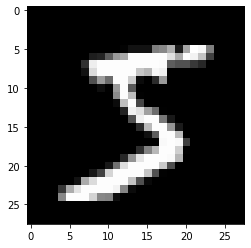

In [4]:
import matplotlib.pyplot as plt
img = train_images[0]
plt.imshow(np.reshape(img, (28,28)), cmap='gray')


In [5]:
train_labels[0]

5

In [6]:
img.shape

(28, 28)

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(test_labels)

10000

In [12]:
test_labels.shape

(10000,)

In [13]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [15]:
x_val = x_val.reshape((12000, 28 * 28))
x_val = x_val.astype('float32') / 255

In [16]:
train_images.shape

(60000, 784)

In [17]:

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [18]:
train_labels.shape

(60000, 10)

In [19]:
y_val = to_categorical(y_val)

In [20]:
y_val.shape

(12000, 10)

In [21]:
train_labels.shape

(60000, 10)

### Model

Let's try with only 1 layer:

In [22]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [23]:


network = models.Sequential()
network.add(layers.Dense(512, input_shape=(784,)))
network.add(layers.Dense(100))
network.add(layers.Dense(10, activation='softmax'))
#network.add(layers.Dense(10, activation='softmax', input_shape=(784,)))





In [24]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 100)               51300     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 454,230
Trainable params: 454,230
Non-trainable params: 0
_________________________________________________________________


In [25]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
train_labels.shape

(60000, 10)

In [27]:
network.fit(train_images, train_labels, validation_data=(x_val, y_val), epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 16s 14ms/step - loss: 0.4068 - accuracy: 0.8830 - val_loss: 0.3996 - val_accuracy: 0.8811
Epoch 2/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3364 - accuracy: 0.9056 - val_loss: 0.2944 - val_accuracy: 0.9168
Epoch 3/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3172 - accuracy: 0.9111 - val_loss: 0.3146 - val_accuracy: 0.9080
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: 0.3066 - accuracy: 0.9140 - val_loss: 0.3226 - val_accuracy: 0.9075
Epoch 5/5
938/938 [==============================] - 13s 14ms/step - loss: 0.2990 - accuracy: 0.9170 - val_loss: 0.3138 - val_accuracy: 0.9087


In [28]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.3247 - accuracy: 0.9074


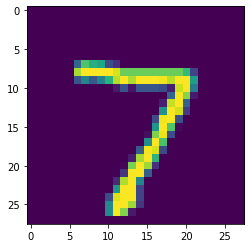

In [29]:
import matplotlib.pyplot as plt
img = test_images[0]
plt.imshow(np.reshape(img, (28,28)))


In [30]:
img.shape

(784,)

In [31]:
network.predict(np.reshape(img, (1,784)))

1/1 [==============================] - 0s 93ms/step


array([[4.3674167e-08, 3.3442752e-11, 5.6451904e-07, 9.6297328e-04,
        6.1353362e-08, 3.4864972e-06, 2.9463067e-11, 9.9849546e-01,
        1.0095121e-06, 5.3643074e-04]], dtype=float32)

In [32]:
np.argmax(network.predict(np.reshape(img, (1,784))))

1/1 [==============================] - 0s 31ms/step


7

In [33]:
print('test_acc:', test_acc)

test_acc: 0.9074000120162964



# Let's add 1 more hidden layer:

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

## 2. Model

In [35]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [36]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## 3. Loss
## 4. Optimizer
Both under one step in Keras called compile

In [40]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [41]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels.shape)
print(train_labels[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [42]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 12ms/step - loss: 0.2557 - accuracy: 0.9256
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1034 - accuracy: 0.9694
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0689 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0499 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0374 - accuracy: 0.9889


In [43]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0715 - accuracy: 0.9811


# Sparse categorical

Another solution

60,000x10 is too much RAM!

Use sparse_categorical_crossentroppy loss

In [44]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2585 - accuracy: 0.9250
Epoch 2/5
469/469 [==============================] - 6s 12ms/step - loss: 0.1051 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0695 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 0.0497 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0376 - accuracy: 0.9882


# Let's add more layers:

In [45]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', name='Layer_1', input_shape=(28 * 28,)))
network.add(layers.Dense(512, activation='relu', name='Layer_2'))
network.add(layers.Dense(256, activation='relu', name='Layer_3'))
network.add(layers.Dense(50, activation='relu', name='Layer_4'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_1 (Dense)             (None, 512)               401920    
                                                                 
 Layer_2 (Dense)             (None, 512)               262656    
                                                                 
 Layer_3 (Dense)             (None, 256)               131328    
                                                                 
 Layer_4 (Dense)             (None, 50)                12850     
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 809,264
Trainable params: 809,264
Non-trainable params: 0
_________________________________________________________________


In [46]:
network.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 11s 21ms/step - loss: 0.2571 - accuracy: 0.9198
Epoch 2/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0950 - accuracy: 0.9719
Epoch 3/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0669 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 10s 21ms/step - loss: 0.0506 - accuracy: 0.9847
Epoch 5/5
469/469 [==============================] - 10s 22ms/step - loss: 0.0400 - accuracy: 0.9879


In [47]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 6ms/step - loss: 0.0949 - accuracy: 0.9786
